In [4]:

import os
import json
import glob
import copy
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd


from scipy import stats as spstats

from pipeline.python.classifications import bootstrap_fit_tuning_curves as osi
from pipeline.python.classifications import experiment_classes as util
from pipeline.python.utils import natural_keys, label_figure

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/test_responsivity.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    

In [5]:
%matplotlib notebook

# Select data set

In [6]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC084' #'JC059'
session = '20190522' #'20190227'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
traceid = 'traces001' #'traces001'
response_type = 'dff'

# Set responsivity params

In [7]:
responsive_test = 'nstds'
responsive_thr = 10
n_stds = 2.5


# Set bootstrap params

In [8]:
n_bootstrap_iters = 100
n_resamples = 60
n_intervals_interp = 3

In [10]:
reload(osi)

<module 'pipeline.python.classifications.bootstrap_fit_tuning_curves' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/bootstrap_fit_tuning_curves.py'>

# Create experiment object

In [9]:
exp = util.Gratings(animalid, session, fov, traceid=traceid, rootdir=rootdir)
exp.print_info()

... [JC084|20190522|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
************* Experiment Object info *************
Name: combined_gratings_static
Experiment type: gratings
Animalid: JC084
Session: 20190522
FOV: FOV1_zoom2p0x
roi-id, trace-id: rois001, traces001
('Data source:', '/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/data_arrays/datasets.npz')
No data loaded yet.
**************************************************


In [23]:
df_traces, labels, gdf, sdf = osi.load_gratings_data(exp.source, add_offset=True)


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/bootstrap_fit_tuning_curves.py:1058: RuntimeWarning: invalid value encountered in divide
  F0 = np.nanmean(dset['corrected'][:] / dset['dff'][:] )


offset: 644.22


In [24]:
roi_list, nrois_total = exp.get_responsive_cells(response_type=response_type, 
                                    responsive_test=responsive_test, 
                                    responsive_thr=responsive_thr, 
                                    n_stds=n_stds)

print("Found %i of %i responsive cells [test: %s (thr %.2f, n_stds: %.2f)" % (len(roi_list), nrois_total, responsive_test, responsive_thr, n_stds))


... getting responsive cells (test: nstds, thr: 10.00')
Found 127 of 260 responsive cells [test: nstds (thr 10.00, n_stds: 2.50)


<IPython.core.display.Javascript object>


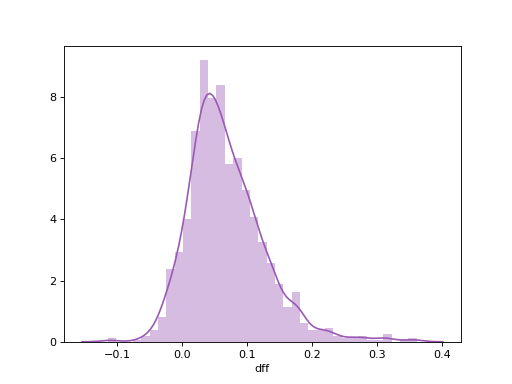

In [25]:
roi = 17
pl.figure()

sns.distplot(gdf.get_group(17)['dff'])

In [22]:
gdf.get_group(roi)['dff'].min(), gdf.get_group(17).max()

(-100.69853924906617, bas_mean_df     2.58379e-15
 bas_std_df          156.916
 base_mean           305.884
 base_std            105.537
 config            config064
 df                  272.622
 dff                 425.165
 snr                 426.165
 stim_mean           524.937
 stim_mean_df        425.165
 trial            trial01240
 zscore              4.81535
 dtype: object)